# Self-Organizing Maps

## Praktikum

### a) Fungsi *self-organizing maps*
Tulis kode ke dalam *cell* di bawah ini:

In [1]:
import numpy as np

def som(X, lrate, b, max_epoch, n_cluster):
  centroids = np.random.uniform(size=(n_cluster, len(X[0])))
  epoch = 0
  labels = []

  while epoch < max_epoch:
    for x in X:
      d = [sum((w - x) ** 2) for w in centroids]
      min = np.argmin(d)
      centroids[min] += lrate * (x - centroids[min])

    lrate *= b
    epoch += 1

  for x in X:
    d = [sum((w - x) ** 2) for w in centroids]
    min = np.argmin(d)

    labels.append(min)

  return centroids, labels

def draw(X, target, centroids):
  colors = 'rgbcmyk'

  for x, label in zip(X, target):
    plt.plot(x[0], x[1], colors[label] + '.')

  plt.plot(centroids[:, 0], centroids[:, 1],'kx')

### b) Klasterisasi
Tulis kode ke dalam *cell* di bawah ini:

silhouette score:  0.7215682462170806


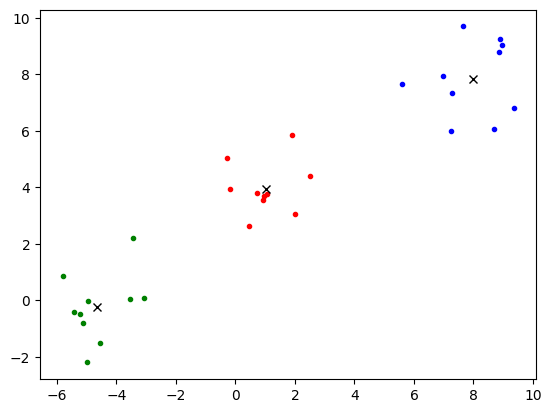

In [2]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, target = make_blobs(n_samples = 30, n_features = 2, centers = 3, random_state = 3)
centroids, labels = som(X, lrate = 0.5, b = 0.5, max_epoch = 100, n_cluster = 3)

silhouette = silhouette_score(X, labels)
print('silhouette score: ', silhouette)
draw(X, target, centroids)

## Analisis

1. Ubah parameter kode b menjadi a = 0,05 dan max_epoch = 3, analisis hasil dan nilai silhouette yang didapatkan

silhouette score:  0.29613180669265315


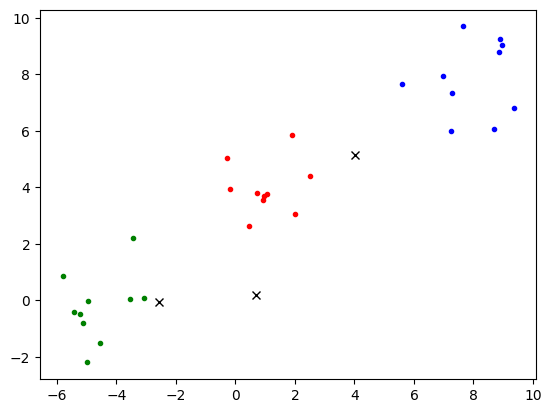

In [3]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, target = make_blobs(n_samples = 30, n_features = 2, centers = 3, random_state = 3)
centroids, labels = som(X, lrate = 0.05, b = 0.5, max_epoch = 3, n_cluster = 3)

silhouette = silhouette_score(X, labels)
print('silhouette score: ', silhouette)
draw(X, target, centroids)

*   Banyak data tidak terkumpul pada titik centroid / neuron, jumlah epoch yang terlalu sedikit dan learning rate tearllu kecil menyebabkan data tidak ter cluster dengan baik
